# Expected vs. Realized Move in Options Using Random Forest Regression

This educational project investigates the relationship between **expected** and **realized moves** ($EM$ and $RM$, respectively) in equity options, focusing on the challenge of forecasting how much an underlying asset will move based on option market signals.

Using a **Random Forest regression** approach—a common machine learning method—we examine how closely the **market’s expectations** ($EM$), reflected in an option contract’s price and its implied volatility, correspond to the **actual realized price movements** ($RM$). We then build a Random Forest Regressor to predict the magnitude of $RM$ for a fixed horizon ($h$) and analyze the conditions under which these forecasts provide meaningful insight.

This project aims to deepen our understanding of how predictive market-implied volatility is for future movements, advancing our knowledge of risk, price forecasting, and volatility management in financial decision-making and equity investing.


## Introduction to Stock Market Trading, Options & $EM$ vs. $RM$

Stock prices change continually as investors buy and sell shares. This movement is influenced by company news, economic data, and trader sentiment, leading to periods of rising (bull) or falling (bear) prices.
 
**Options** are financial contracts that give buyers the right, but not the obligation, to buy or sell an underlying stock at a specific price (the **strike price**, $K$) on or before a set date (the **expiry**). In other words, options let you bet on whether a stock’s price will go up or down, and at what level you can make that bet.
- **Call options:** Gives the right to **buy** the stock at $K$. This is like betting that the stock price will go above a certain level. The payoff formula for a call option at expiry is: $$\max(S_T - K, 0)$$
Where,
    - $K$ is the **strike price**—the predetermined price at which the option holder can buy the stock.
    - $S_T$ is the **stock price at the time of expiry** ($T$).
    - The expression $(S_T - K)$ represents how much the stock price is above the strike price at expiry.
    - The $\max(\cdot, 0)$ function means you take the greater of $(S_T - K)$ or 0. This guarantees that if the option ends up "out-of-the-money" (i.e., $S_T < K$), the payoff cannot be negative. The option contract then will simply expires worthless.

     Put simply: if you have a call option, you get paid the difference if the stock ends up higher than your agreed price, otherwise, you get nothing. You’d only use your option if you could buy cheaper than in the market. If not, you just let it expire and lose nothing extra.


- **Put options:** Gives the right to **sell** the stock at $K$. This is like betting that the stock price will fall below a certain level. The payoff formula for a put option at expiry is: $$\max(K - S_T, 0)$$
Where,
    - $K$ is the **strike price**—the predetermined price at which the option holder can sell the stock.
    - $S_T$ is the **stock price at the time of expiry** ($T$).
    - The expression $(K - S_T)$ represents how much the strike price is above the stock price at expiry.
    - The $\max(\cdot, 0)$ function means you take the greater of $(K - S_T)$ or 0. This ensures that if the option finishes "out-of-the-money" (i.e., $S_T > K$), the payoff cannot be negative. The put then simply expires worthless.

     Put simply (no pun intended): if you have a put option, you get paid the difference if the stock ends up lower than your agreed sell price, otherwise, you get nothing. You’d only use your option if you could sell higher than in the market. If not, you just let it expire and lose nothing extra.
 
Option prices are influenced not just by the current stock price, but also by the expected amount the stock will move by expiry. This expectation is captured in the **implied volatility (IV)** of the option. This is a measure derived from option prices that reflects the market's consensus on how much the stock might fluctuate.

Traders often use IV to estimate the **Expected Move ($EM$)**, which determines how much the stock price is likely to change over a given period. The **expected move** over a horizon of $h$ days (using at-the-money implied volatility) is calculated as follows:

$$
\text{EM}_{t,h} = \sigma^{ATM}_t \sqrt{\frac{h}{252}}
$$

Where:
- $\text{EM}_{t,h}$ is the **Expected Move** over the next $h$ trading days, starting from time $t$.
- $\sigma^{ATM}_t$ is the **at-the-money implied volatility** at time $t$ (usually quoted as an annualized percentage, such as 20%).
- $h$ is the **number of trading days** in your forecast window (for example, $h=5$ for a week, $h=21$ for a month).
- 252 is the **typical number of trading days in a year** (used to annualize or de-annualize volatility).
- The square root component, $\sqrt{\frac{h}{252}}$, adjusts the annualized implied volatility to the shorter time frame of $h$ days. This reflects the idea from financial theory that volatility scales with the square root of time.

In plain language:
- The formula takes the market’s current “best guess” (from option prices) for how much the stock would fluctuate in a year, then converts it—using the square-root rule—to estimate the likely move over just $h$ days.
- For example, if you want to know how much the stock might move in the next week, plug in $h=5$.
- This gives you a market-implied estimate of the range within which the stock price might end up after $h$ days.

After the period ends, we can observe the **Realized Move ($RM$)**, which is the actual movement that occurred in the underlying stock over the horizon we’re measuring. The formula for realized move over $h$ days is:

$$\text{RM}_{t,h} = \left| \ln \left( \frac{P_{t+h}}{P_t} \right) \right|$$

Where,
- $\text{RM}_{t,h}$ is the **Realized Move** between time $t$ and $t+h$ (the *actual* observed change over $h$ days).
- $P_t$ is the **stock price at the start** (time $t$).
- $P_{t+h}$ is the **stock price at the end** of the $h$-day period.
- The fraction $\frac{P_{t+h}}{P_t}$ tells us how much the price has changed relative to its starting value.
- The natural logarithm $\ln(\cdot)$ is used to measure the size of the price change in a way that is fair for both upward and downward moves, and lets us easily compare changes across different prices or stocks.
- The absolute value $|\cdot|$ ensures that we are measuring the magnitude of the movement, regardless of whether the stock price went up or down.

In plain language:
- The realized move is the absolute size of the log-return from $t$ to $t+h$. It shows how much the stock actually changed in price (up or down) over the period, without regard to direction, just the size.

Suppose the stock price today is 100 USD. The options market is implying a 5% expected move ($EM$) over the next week. In this scenario, people expect the price could end up anywhere between $95 and $105. This is written as:
$$
\text{EM}_{t,5\text{D}} = 5%
$$

Two possible outcomes can occur by the end of the week:

* **If the stock finishes at $108:**
  The realized move ($RM$) is
  $$
  \text{RM} = \left| \ln\left( \frac{108}{100} \right) \right| \approx 7.7% \approx 8%
  $$
  This is larger than what the options market predicted, meaning the stock was more volatile than expected.

* **If the stock finishes at $103:**
  The realized move ($RM$) is
  $$
  \text{RM} = \left| \ln\left( \frac{103}{100} \right) \right| \approx 3%
  $$
  This is smaller than the expected move; the stock was calmer than the options market anticipated.

In this example, intuitively, if the market priced in a 5 USD move but the stock ran up 8 USD, that indicates unexpected volatility; if it only moved $3, things were quieter than expected.

If you calculated the realized move not just from the starting and ending prices but based on the **highest and lowest** prices during the week, you’d get a larger number because this method captures all the swings up and down, not just where you started and finished.

Finally, if you look at realized moves over longer horizons (like a month instead of a week), the big ups and downs can cancel each other out or get averaged in, which typically smooths out the realized move.




## What is Regression? What is Random Forest Regression?



**Regression** is a type of machine learning that predicts a continuous numeric value, given a set of features. In our case, we use regression to forecast the realized move ($RM$, actual volatility) of a stock, using data such as option prices, historical price patterns, and more.

A **Random Forest** is an ensemble learning method that builds many decision trees and averages their predictions. Here’s how it works:

- Each **decision tree** is trained on a random sample of the data (with replacement — aka bootstrapping).
- At each split in a tree, only a random subset of features is considered, making every tree see a slightly different part of the data.
- The **final prediction** is the average (for regression) of all trees’ predictions.

For a Random Forest, the prediction for an input $X$ is calculated as:
$$
\hat{y} = \frac{1}{N} \sum_{i=1}^{N} T_i(X)
$$
Where,

- $\hat{y}$ is the final prediction made by the Random Forest.
- $N$ represents the total number of decision trees in the forest.
- $T_i(X)$ is the prediction for $X$ made by the $i$-th decision tree.
- The sum $\sum_{i=1}^{N} T_i(X)$ means we add up the predictions from all the trees.
- Finally, we divide by $N$ to take the average, so the Random Forest output is the mean of all the tree predictions.

This process helps the Random Forest provide more stable and accurate predictions by pooling together the results from many different trees.

**We can use a Random Forest for this problem because:**
- It can model highly **nonlinear relationships**—which are common in finance.
- It’s highly effective for **tabular data** with many features (like ours).
- It’s **robust to outliers and multicollinearity** (when features are correlated).
- By averaging many trees, it reduces overfitting and variance (the **bias–variance trade-off**) without much need for feature scaling or heavy preprocessing.

Random Forest also allows tuning parameters to improve performance:
- `n_estimators`: Number of trees (more = smoother, more robust predictions)
- `max_depth`, `max_features`: Control tree complexity and diversity
- `min_samples_split`, `min_samples_leaf`: Prevent trees from growing too fine (“overfitting” small blips)

Here is a visual example of a Random Forest Regression (sourced from https://www.spotfire.com/glossary/what-is-a-random-forest):
<img src="random-forest-diagram.svg" alt="Random Forest Diagram" style="width:40%; display:block; margin:auto;">
<em>
Figure Above: A Random Forest is an ensemble of decision trees, each trained on a bootstrapped sample of the dataset and a random subset of features. Each tree makes its own prediction independently, capturing different aspects of the data’s underlying patterns. The forest then aggregates these individual outputs, averaging for regression tasks to produce a more stable, accurate, and less overfitted final prediction.
</em>


The goal of this project is to model and predict $RM$ (the realized, or actual, volatility) using features including option market data, with a **Random Forest Regression** model.




## Dataset Understanding  &  Preprocessing

We are modeling equity-level options for a small, diverse trading universe: AAPL (Apple), MSFT (Microsoft), NVDA (Nvidia), TSLA (Tesla), AMZN (Amazon), JPM (JPMorgan) and XOM (Exxon Mobil).

In [1]:
# === REAL OHLCV for last ~2 years (with dtype fixes) =========================
from __future__ import annotations
import pandas as pd, numpy as np
from pathlib import Path
from datetime import datetime, timedelta
import yfinance as yf

UNIVERSE = ["AAPL","MSFT","NVDA","TSLA","AMZN","JPM","XOM"]

DATA_DIR     = Path("Data")
EQUITY_DIR   = DATA_DIR / "Snapshots_OHLCV"
EQUITY_DIR.mkdir(parents=True, exist_ok=True)
OUT_OHLCV    = EQUITY_DIR / "ohlcv_latest.csv"

# Date range (2y back from today, inclusive)
END   = datetime.today().date()
START = END - timedelta(days=int(365*2.1))  # a little buffer

frames = []
for tk in UNIVERSE:
    df = yf.download(
        tk, start=str(START), end=str(END + timedelta(days=1)),
        interval="1d", auto_adjust=False, progress=False
    )
    if df.empty:
        print(f"[WARN] No OHLCV for {tk}")
        continue

    # Ensure index is datetime and bring it out as a column
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index, errors="coerce")
    df = df.reset_index()

    # Flatten & lowercase column names
    def _flat(c):
        if isinstance(c, tuple):
            return "_".join([str(x) for x in c if x is not None]).strip().lower()
        return str(c).strip().lower()
    df.columns = [_flat(c) for c in df.columns]

    # Insert ticker
    df.insert(0, "ticker", tk)

    # Deduplicate any repeated columns
    df = df.loc[:, ~pd.Index(df.columns).duplicated(keep="first")]

    # ---- Normalize date column ----
    # Prefer 'date' if present; otherwise try common variants or any datetime-typed col.
    date_col = None
    if "date" in df.columns:
        date_col = "date"
    else:
        candidates = [c for c in df.columns if c in ("datetime","index","date_") or c.startswith("date")]
        if not candidates:
            candidates = [c for c in df.columns if pd.api.types.is_datetime64_any_dtype(df[c])]
        if candidates:
            date_col = candidates[0]
    if date_col is None:
        raise KeyError(f"[{tk}] Could not identify a date column. Columns: {list(df.columns)}")

    df["date"] = pd.to_datetime(df[date_col], errors="coerce")

    # ---- Strip ticker suffixes like *_aapl / *_msft on price/volume cols ----
    tkl = tk.lower()
    base_names = ["open","high","low","close","adj close","adj_close","volume"]
    rename_map = {}
    for base in base_names:
        suff = f"{base}_{tkl}"
        if base in df.columns:
            # keep as-is
            continue
        if suff in df.columns:
            rename_map[suff] = base
    df = df.rename(columns=rename_map)

    # Standardize 'adj close' -> 'adj_close'
    if "adj close" in df.columns and "adj_close" not in df.columns:
        df = df.rename(columns={"adj close": "adj_close"})

    # If 'close' still missing, fallback to adj_close
    if "close" not in df.columns and "adj_close" in df.columns:
        df["close"] = df["adj_close"]

    # Coerce numeric types
    num_cols = [c for c in ["open","high","low","close","adj_close","volume"] if c in df.columns]
    if num_cols:
        df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

    # Validate required cols
    required_now = {"ticker","date","close"}
    missing = required_now - set(df.columns)
    if missing:
        raise KeyError(f"[{tk}] Missing required columns after normalization: {missing}. Columns: {list(df.columns)}")

    # Clean & sort
    df = (
        df.dropna(subset=["ticker","date","close"])
        .query("close > 0")
        .sort_values(["ticker","date"])
    )

    # Keep standard columns that exist
    keep = [c for c in ["ticker","date","open","high","low","close","adj_close","volume"] if c in df.columns]
    frames.append(df[keep])


ohlcv = pd.concat(frames, ignore_index=True).sort_values(["ticker","date"])
ohlcv.to_csv(OUT_OHLCV, index=False)
print(f"Saved OHLCV → {OUT_OHLCV.resolve()}  rows={len(ohlcv)}")
ohlcv.head()



Saved OHLCV → /Users/topfloor/Documents/Options-Random-Forest/Data/Snapshots_OHLCV/ohlcv_latest.csv  rows=3682


,ticker,date,open,high,low,close,adj_close,volume
0,AAPL,2023-10-05,173.789993,175.449997,172.679993,174.910004,173.213394,48527900
1,AAPL,2023-10-06,173.800003,177.990005,173.179993,177.490005,175.768387,57266700
2,AAPL,2023-10-09,176.809998,179.050003,175.800003,178.990005,177.253830,42390800
3,AAPL,2023-10-10,178.100006,179.720001,177.949997,178.389999,176.659622,43698000
4,AAPL,2023-10-11,178.199997,179.850006,177.600006,179.800003,178.055969,47551100


In [ ]:
# === SYNTHETIC option snapshots across ~2 years (with dtype fixes) ===========
from __future__ import annotations
import pandas as pd, numpy as np
from pathlib import Path

OHLCV_PATH = Path("Data/Snapshots_OHLCV/ohlcv_latest.csv")
IV_DIR     = Path("Data/Snapshots_IV"); IV_DIR.mkdir(parents=True, exist_ok=True)

# Controls
SNAPSHOTS_PER_WEEK = 2
EXPIRY_DAYS        = [7, 30, 60]
STRIKE_STEPS       = 21
VOLPOINT_NOISE     = 0.02
RNG_SEED           = 7

rng = np.random.default_rng(RNG_SEED)

# --- Load OHLCV (with dtype coercion) ---
ohlcv = pd.read_csv(OHLCV_PATH, parse_dates=["date"])
ohlcv.columns = [c.strip().lower() for c in ohlcv.columns]

# FIX: ensure numeric price/volume cols
num_cols = [c for c in ["open","high","low","close","adj_close","volume"] if c in ohlcv.columns]
for c in num_cols:
    ohlcv[c] = pd.to_numeric(ohlcv[c], errors="coerce")

# FIX: drop bad rows and nonpositive
ohlcv = (
    ohlcv.dropna(subset=["ticker","date","close"])
         .query("close > 0")
         .sort_values(["ticker","date"])
)

# annualized 21d realized vol per ticker/date as baseline for IV
def add_rv21(g: pd.DataFrame) -> pd.DataFrame:
    g = g.sort_values("date").copy()
    # FIX: clip to avoid log(0) or negatives
    logc = np.log(g["close"].clip(lower=1e-8))
    rd = logc.diff()
    g["rv21"] = rd.rolling(21).std() * np.sqrt(252)
    return g

ohlcv = ohlcv.groupby("ticker", group_keys=False).apply(add_rv21)

# Eligible snapshot dates (need 21d forward data for RM later)
last_ok = ohlcv["date"].max() - pd.tseries.offsets.BDay(21)
trading_days = (
    ohlcv[ohlcv["date"] <= last_ok]["date"]
    .drop_duplicates().sort_values()
)

# Sample ~2 snapshots per week across the period
tmp = pd.DataFrame({"date": trading_days})
tmp["yearweek"] = tmp["date"].dt.strftime("%G-%V")
tmp["rank_in_week"] = tmp.groupby("yearweek")["date"].rank(method="first")
snap_dates = tmp[tmp["rank_in_week"] <= SNAPSHOTS_PER_WEEK]["date"].tolist()

def next_friday(d: pd.Timestamp) -> pd.Timestamp:
    return d + pd.Timedelta(days=(4 - d.weekday()) % 7)

def make_strikes(spot: float, steps: int) -> np.ndarray:
    ks = np.linspace(-0.20, 0.20, steps)              # ±20% moneyness
    strikes = spot * (1.0 + ks)
    inc = 1.0 if spot < 200 else 2.5 if spot < 500 else 5.0
    strikes = (np.round(strikes / inc) * inc).astype(float)
    return np.unique(strikes)

def synth_iv(base_iv: float, m: float, tau_days: int) -> float:
    if not np.isfinite(base_iv) or base_iv <= 0:
        base_iv = 0.25
    skew  = -0.6 * m                                # equity skew
    term  = 0.15 * np.log1p(tau_days / 365)         # term structure
    noise = rng.normal(0.0, VOLPOINT_NOISE)
    iv    = base_iv * (1 + skew + term) + noise
    return float(np.clip(iv, 0.05, 1.50))

written = []
for asof in snap_dates:
    day_df = ohlcv[ohlcv["date"] == asof]
    if day_df.empty:
        continue

    rows = []
    for tk, g in day_df.groupby("ticker"):
        s = float(g["close"].iloc[0])
        rv = float(g["rv21"].iloc[0])
        strikes = make_strikes(s, STRIKE_STEPS)

        for ed in EXPIRY_DAYS:
            # FIX: use next_friday (typo was 'nex')
            exp = next_friday(pd.Timestamp(asof) + pd.Timedelta(days=ed))
            tau = int((exp - pd.Timestamp(asof)).days)

            for K in strikes:
                m = (K / s) - 1.0
                iv_val = synth_iv(rv, m, tau)

                rows.append({
                    "ticker": tk, "type": "call", "strike": float(K),
                    "implied_vol": iv_val, "expiration": exp,
                    "underlying_close": s, "asof_date": pd.Timestamp(asof)
                })
                rows.append({
                    "ticker": tk, "type": "put", "strike": float(K),
                    "implied_vol": iv_val, "expiration": exp,
                    "underlying_close": s, "asof_date": pd.Timestamp(asof)
                })

    if rows:
        out_path = IV_DIR / f"iv_{pd.Timestamp(asof).date().isoformat()}.csv"
        pd.DataFrame(rows).to_csv(out_path, index=False)
        written.append((out_path, len(rows)))

print(f"Wrote {len(written)} synthetic snapshots over ~2 years:")
for p, n in written[:6]:
    print(f"  - {p.name:<20} rows={n}")
if len(written) > 6:
    print("  ...")


/var/folders/zz/99ymqnxx5jb7pb2y7mpsjx3r0000gn/T/ipykernel_52277/3373001739.py:43: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ohlcv = ohlcv.groupby("ticker", group_keys=False).apply(add_rv21)


Wrote 212 synthetic snapshots over ~2 years:
  - iv_2023-10-05.csv    rows=870
  - iv_2023-10-06.csv    rows=870
  - iv_2023-10-09.csv    rows=870
  - iv_2023-10-10.csv    rows=870
  - iv_2023-10-16.csv    rows=870
  - iv_2023-10-17.csv    rows=870
  ...


In [5]:
# === Aggregate synthetic IV snapshots → ATM IV master ========================
from __future__ import annotations
import pandas as pd, numpy as np
from pathlib import Path
import glob

IV_DIR = Path("Data/Snapshots_IV")
OUT_MASTER = IV_DIR / "iv_master.csv"
OUT_MASTER_EM = IV_DIR / "iv_master_em.csv"

HORIZONS = [1, 5, 21]   # trading-day horizons
TRADING_DAYS = 252

# ---- 1) Load all snapshot CSVs ----
files = sorted(glob.glob(str(IV_DIR / "iv_*.csv")))
if not files:
    raise FileNotFoundError(f"No snapshot files found in {IV_DIR}. Expected iv_YYYY-MM-DD.csv")

iv_list = []
for f in files:
    df = pd.read_csv(f)
    # normalize columns
    df.columns = [c.strip().lower() for c in df.columns]
    # required columns in our synthetic generator
    need = {"ticker","type","strike","implied_vol","expiration","underlying_close","asof_date"}
    missing = need - set(df.columns)
    if missing:
        raise KeyError(f"{f} missing columns: {missing}")
    # types
    df["type"] = df["type"].str.lower()
    df["asof_date"] = pd.to_datetime(df["asof_date"])
    df["expiration"] = pd.to_datetime(df["expiration"])
    # numeric
    for c in ["strike","implied_vol","underlying_close"]:
        df[c] = pd.to_numeric(df[c], errors="coerce")
    # drop junk
    df = df.dropna(subset=["ticker","type","strike","implied_vol","expiration","underlying_close","asof_date"])
    iv_list.append(df)

iv_raw = pd.concat(iv_list, ignore_index=True)

# ---- 2) ATM IV selection (nearest strike; avg call/put IV) ----
iv = iv_raw.copy()
iv["strike_diff"] = (iv["strike"] - iv["underlying_close"]).abs()

# locate nearest strike index per (ticker, asof_date, expiration)
idx = iv.groupby(["ticker","asof_date","expiration"])["strike_diff"].idxmin()
nearest = iv.loc[idx, ["ticker","asof_date","expiration","strike"]]

# join back and average call/put IV at that exact strike (synthetic has both)
atm = (
    iv.merge(nearest, on=["ticker","asof_date","expiration","strike"], how="inner")
      .groupby(["ticker","asof_date","expiration"], as_index=False)
      .agg(
          underlying_close=("underlying_close","first"),
          strike=("strike","first"),
          atm_iv=("implied_vol","mean")
      )
)

# ---- 3) Sanity checks / clamps (should rarely trigger with our generator) ----
atm["atm_iv"] = atm["atm_iv"].clip(lower=0.05, upper=1.50)
atm = atm.sort_values(["ticker","asof_date","expiration"]).reset_index(drop=True)

# drop any accidental duplicates
atm = atm.drop_duplicates(subset=["ticker","asof_date","expiration"])

# ---- 4) Save iv_master.csv ----
OUT_MASTER.parent.mkdir(parents=True, exist_ok=True)
atm.to_csv(OUT_MASTER, index=False)
print(f"Saved ATM IV master → {OUT_MASTER.resolve()}  rows={len(atm)}")

# ---- (Optional but useful) Compute EM for horizons and save iv_master_em.csv ----
def expected_move(atm_iv: pd.Series, h: int) -> pd.Series:
    return atm_iv * np.sqrt(h / TRADING_DAYS)

blocks = []
for h in HORIZONS:
    tmp = atm.copy()
    tmp["h"] = h
    tmp["EM"] = expected_move(tmp["atm_iv"], h)
    blocks.append(tmp)

iv_master_em = pd.concat(blocks, ignore_index=True)
iv_master_em.to_csv(OUT_MASTER_EM, index=False)
print(f"Saved ATM IV + EM → {OUT_MASTER_EM.resolve()}  rows={len(iv_master_em)}")

# quick peek
display(iv_master_em.head())


Saved ATM IV master → /Users/topfloor/Documents/Options-Random-Forest/Data/Snapshots_IV/iv_master.csv  rows=4452
Saved ATM IV + EM → /Users/topfloor/Documents/Options-Random-Forest/Data/Snapshots_IV/iv_master_em.csv  rows=13356


,ticker,asof_date,expiration,underlying_close,strike,atm_iv,h,EM
0,AAPL,2023-10-05,2023-10-13,174.910004,175.0,0.260533,1,0.016412
1,AAPL,2023-10-05,2023-11-10,174.910004,175.0,0.243895,1,0.015364
2,AAPL,2023-10-05,2023-12-08,174.910004,175.0,0.257472,1,0.016219
3,AAPL,2023-10-06,2023-10-13,177.490005,177.0,0.235530,1,0.014837
4,AAPL,2023-10-06,2023-11-10,177.490005,177.0,0.232087,1,0.014620


In [ ]:
# === Build final modeling dataset: Features (OHLCV + EM) + Target (RM) =======
from __future__ import annotations
import pandas as pd, numpy as np
from pathlib import Path

# Paths
OHLCV_PATH      = Path("Data/Snapshots_OHLCV/ohlcv_latest.csv")
IV_MASTER_EM    = Path("Data/Snapshots_IV/iv_master_em.csv")
FEATURE_DIR     = Path("Data/Feature"); FEATURE_DIR.mkdir(parents=True, exist_ok=True)
OUT_DATASET     = FEATURE_DIR / "em_feature_with_RM.csv"

HORIZONS     = [1, 5, 21]
TRADING_DAYS = 252

# ---------- Load ----------
ohlcv = pd.read_csv(OHLCV_PATH, parse_dates=["date"])
ohlcv.columns = [c.strip().lower() for c in ohlcv.columns]

ivm = pd.read_csv(IV_MASTER_EM, parse_dates=["asof_date","expiration"])
ivm.columns = [c.strip().lower() for c in ivm.columns]

# Keep one expiration per (ticker, asof_date, h): nearest expiration
ivm = (ivm.sort_values(["ticker","asof_date","expiration"])
          .groupby(["ticker","asof_date","h"], as_index=False)
          .first())
ivm = ivm[["ticker","asof_date","h","atm_iv","em","expiration","strike","underlying_close"]]

# ---------- Equity rolling features (per date, no leakage) ----------
def fe_per_ticker(g: pd.DataFrame) -> pd.DataFrame:
    g = g.sort_values("date").copy()
    # numeric safety
    for c in ["open","high","low","close","adj_close","volume"]:
        if c in g.columns:
            g[c] = pd.to_numeric(g[c], errors="coerce")
    # log returns
    logc = np.log(g["close"].clip(lower=1e-12))
    g["logret_1d"]  = logc.diff(1)
    g["logret_5d"]  = logc.diff(5)
    g["logret_21d"] = logc.diff(21)
    rd = logc.diff(1)
    # rolling vols (annualized)
    g["vol_10d"] = rd.rolling(10, min_periods=10).std() * np.sqrt(TRADING_DAYS)
    g["vol_21d"] = rd.rolling(21, min_periods=21).std() * np.sqrt(TRADING_DAYS)
    # momentum / volume signal
    g["sma5"]  = g["close"].rolling(5, min_periods=5).mean()
    g["sma20"] = g["close"].rolling(20, min_periods=20).mean()
    g["sma5_minus_20"] = (g["sma5"] - g["sma20"]) / g["close"]
    if "volume" in g.columns:
        g["vol_ma20"]  = g["volume"].rolling(20, min_periods=20).mean()
        g["vol_std20"] = g["volume"].rolling(20, min_periods=20).std()
        g["vol_z"]     = (g["volume"] - g["vol_ma20"]) / g["vol_std20"]
    else:
        g["vol_z"] = np.nan
    return g

eq = (ohlcv.dropna(subset=["ticker","date","close"])
             .query("close > 0")
             .groupby("ticker", group_keys=False)
             .apply(fe_per_ticker))

eq = eq[["ticker","date","close","logret_1d","logret_5d","logret_21d",
         "vol_10d","vol_21d","sma5_minus_20","vol_z"]].rename(columns={"date":"t_date","close":"Pt"})

# === Build final modeling dataset: Features (OHLCV + EM) + Target (RM) =======
from __future__ import annotations
import pandas as pd, numpy as np
from pathlib import Path

# Paths
OHLCV_PATH      = Path("Data/Snapshots_OHLCV/ohlcv_latest.csv")
IV_MASTER_EM    = Path("Data/Snapshots_IV/iv_master_em.csv")
FEATURE_DIR     = Path("Data/Feature"); FEATURE_DIR.mkdir(parents=True, exist_ok=True)
OUT_DATASET     = FEATURE_DIR / "em_feature_with_RM.csv"

HORIZONS     = [1, 5, 21]
TRADING_DAYS = 252

# ---------- Load ----------
ohlcv = pd.read_csv(OHLCV_PATH, parse_dates=["date"])
ohlcv.columns = [c.strip().lower() for c in ohlcv.columns]

ivm = pd.read_csv(IV_MASTER_EM, parse_dates=["asof_date","expiration"])
ivm.columns = [c.strip().lower() for c in ivm.columns]

# Keep one expiration per (ticker, asof_date, h): nearest expiration
ivm = (ivm.sort_values(["ticker","asof_date","expiration"])
          .groupby(["ticker","asof_date","h"], as_index=False)
          .first())
ivm = ivm[["ticker","asof_date","h","atm_iv","em","expiration","strike","underlying_close"]]

# ---------- Equity rolling features (per date, no leakage) ----------
def fe_per_ticker(g: pd.DataFrame) -> pd.DataFrame:
    g = g.sort_values("date").copy()
    # numeric safety
    for c in ["open","high","low","close","adj_close","volume"]:
        if c in g.columns:
            g[c] = pd.to_numeric(g[c], errors="coerce")
    # log returns
    logc = np.log(g["close"].clip(lower=1e-12))
    g["logret_1d"]  = logc.diff(1)
    g["logret_5d"]  = logc.diff(5)
    g["logret_21d"] = logc.diff(21)
    rd = logc.diff(1)
    # rolling vols (annualized)
    g["vol_10d"] = rd.rolling(10, min_periods=10).std() * np.sqrt(TRADING_DAYS)
    g["vol_21d"] = rd.rolling(21, min_periods=21).std() * np.sqrt(TRADING_DAYS)
    # momentum / volume signal
    g["sma5"]  = g["close"].rolling(5, min_periods=5).mean()
    g["sma20"] = g["close"].rolling(20, min_periods=20).mean()
    g["sma5_minus_20"] = (g["sma5"] - g["sma20"]) / g["close"]
    if "volume" in g.columns:
        g["vol_ma20"]  = g["volume"].rolling(20, min_periods=20).mean()
        g["vol_std20"] = g["volume"].rolling(20, min_periods=20).std()
        g["vol_z"]     = (g["volume"] - g["vol_ma20"]) / g["vol_std20"]
    else:
        g["vol_z"] = np.nan
    return g

eq = (ohlcv.dropna(subset=["ticker","date","close"])
             .query("close > 0")
             .groupby("ticker", group_keys=False)
             .apply(fe_per_ticker))

eq = eq[["ticker","date","close","logret_1d","logret_5d","logret_21d",
         "vol_10d","vol_21d","sma5_minus_20","vol_z"]].rename(columns={"date":"t_date","close":"Pt"})

# ---------- Align EM to each t_date via backward as-of merge ----------
# We cross-join horizons and do per-ticker merge_asof to avoid leakage (asof_date <= t_date).
blocks = []
for h in HORIZONS:
    eq_h = eq.copy()
    eq_h["h"] = h
    # per-ticker as-of merge
    merged = []
    for tk, g in eq_h.groupby("ticker"):
        right = ivm[ivm["ticker"] == tk].sort_values("asof_date")
        left  = g.sort_values("t_date")
        if right.empty:
            continue
        out = pd.merge_asof(
            left, right,
            left_on="t_date", right_on="asof_date",
            direction="backward",
            by="h"  # ensure we match the same horizon
        )
        # keep rows where we actually found an IV snapshot (asof_date not NaT)
        out = out[~out["asof_date"].isna()]
        merged.append(out)
    if merged:
        blocks.append(pd.concat(merged, ignore_index=True))

features = pd.concat(blocks, ignore_index=True) if blocks else pd.DataFrame()

# ---------- Target: Realized Move panel ----------
def compute_rm_panel(ohlcv: pd.DataFrame, horizons: list[int]) -> pd.DataFrame:
    g = ohlcv.sort_values(["ticker","date"]).copy()
    out = []
    for h in horizons:
        g[f"Pt+h_{h}"] = g.groupby("ticker")["close"].shift(-h)
        rm = np.log(g[f"Pt+h_{h}"] / g["close"]).abs()
        tmp = pd.DataFrame({"ticker": g["ticker"], "t_date": g["date"], "h": h, "RM": rm})
        out.append(tmp.dropna(subset=["RM"]))
    return pd.concat(out, ignore_index=True)

rm_panel = compute_rm_panel(ohlcv, HORIZONS)

# ---------- Diagnose & normalize keys, then merge safely ----------
def _normalize_key(df: pd.DataFrame, key: str, extra_aliases=()) -> pd.DataFrame:
    # If key already present, return
    if key in df.columns:
        return df
    # If key is index name, reset to column
    if getattr(df.index, "name", None) == key:
        df = df.reset_index()
        if key in df.columns:
            return df
    # Common aliases/suffixes/prefixes pandas may create
    aliases = set(extra_aliases) | {f"{key}_x", f"{key}_y", key.upper(), key.capitalize()}
    # Any column that contains the key token is a candidate
    aliases |= {c for c in df.columns if key in c.lower()}
    for alt in aliases:
        if alt in df.columns:
            df = df.rename(columns={alt: key})
            return df
    return df

# 0) Peek BEFORE normalization
print("BEFORE — features cols:", list(features.columns))
print("BEFORE — rm_panel cols:", list(rm_panel.columns))

# 1) Normalize keys on both frames
features = _normalize_key(features, "ticker")
features = _normalize_key(features, "t_date", extra_aliases=("date","tdate"))
features = _normalize_key(features, "h", extra_aliases=("H","h_x","h_y"))

rm_panel = _normalize_key(rm_panel, "ticker")
rm_panel = _normalize_key(rm_panel, "t_date", extra_aliases=("date","tdate"))
rm_panel = _normalize_key(rm_panel, "h", extra_aliases=("H","h_x","h_y"))

# 2) If features is empty, fail fast with a helpful message
if features.empty:
    raise RuntimeError(
        "No feature rows after as-of merge. Likely no IV snapshots matched your t_date range.\n"
        "- Check Data/Snapshots_IV/iv_master_em.csv has rows for your tickers.\n"
        "- Ensure HORIZONS matches those in iv_master_em (1,5,21).\n"
        "- Confirm asof_date <= t_date for at least some dates."
    )

# 3) Verify keys exist on BOTH sides
needed = {"ticker","t_date","h"}
missing_left  = needed - set(features.columns)
missing_right = needed - set(rm_panel.columns)
if missing_left or missing_right:
    raise KeyError(
        f"Missing merge keys.\n"
        f"  features missing: {missing_left}\n"
        f"  rm_panel missing: {missing_right}\n"
        f"  features cols: {list(features.columns)}\n"
        f"  rm_panel cols: {list(rm_panel.columns)}"
    )

# 4) Do the merge (use lower-case 'em')
feat_cols = ["logret_1d","logret_5d","logret_21d","vol_10d","vol_21d","sma5_minus_20","vol_z"]
front = ["ticker","t_date","h","Pt","atm_iv","em","asof_date","expiration","strike","underlying_close"]
front = [c for c in front if c in features.columns]
kept_feat_cols = [c for c in feat_cols if c in features.columns]

dataset = (features.merge(rm_panel[["ticker","t_date","h","RM"]], on=["ticker","t_date","h"], how="inner")
                    .dropna(subset=["em","RM"])
                    .sort_values(["ticker","t_date","h"]))

order = [c for c in (front + kept_feat_cols + ["RM"]) if c in dataset.columns]
dataset = dataset[order]

print("AFTER — features shape:", features.shape, "rm_panel shape:", rm_panel.shape, "dataset shape:", dataset.shape)
display(dataset.head())

# Save
dataset.to_csv(OUT_DATASET, index=False)
print(f"Saved dataset → {OUT_DATASET.resolve()}")

# ---------- Final merge (features + target) ----------
feat_cols = ["logret_1d","logret_5d","logret_21d","vol_10d","vol_21d","sma5_minus_20","vol_z"]
order = ["ticker","t_date","h","Pt","atm_iv","em","asof_date","expiration","strike","underlying_close"] + feat_cols + ["RM"]

dataset = (features.merge(rm_panel, on=["ticker","t_date","h"], how="inner")
                    .dropna(subset=["em","RM"])   # lower-case 'em'
                    .sort_values(["ticker","t_date","h"]))

dataset = dataset[order]


# ---------- Save ----------
dataset.to_csv(OUT_DATASET, index=False)
print(f"Saved dataset → {OUT_DATASET.resolve()}  rows={len(dataset)}")

# quick peek
display(dataset.head())


# ---------- Target: Realized Move panel ----------
def compute_rm_panel(ohlcv: pd.DataFrame, horizons: list[int]) -> pd.DataFrame:
    g = ohlcv.sort_values(["ticker","date"]).copy()
    out = []
    for h in horizons:
        g[f"Pt+h_{h}"] = g.groupby("ticker")["close"].shift(-h)
        rm = np.log(g[f"Pt+h_{h}"] / g["close"]).abs()
        tmp = pd.DataFrame({"ticker": g["ticker"], "t_date": g["date"], "h": h, "RM": rm})
        out.append(tmp.dropna(subset=["RM"]))
    return pd.concat(out, ignore_index=True)

rm_panel = compute_rm_panel(ohlcv, HORIZONS)


# ---------- Key normalization before final merge ----------
def _ensure_key(df: pd.DataFrame, key: str, alt_names: list[str]) -> pd.DataFrame:
    if key in df.columns:
        return df
    # if it's the index name, pull it out
    if getattr(df.index, "name", None) == key:
        df = df.reset_index()
        if key in df.columns:
            return df
    # try known alternates (e.g., ticker_x / ticker_y)
    for alt in alt_names:
        if alt in df.columns:
            df = df.rename(columns={alt: key})
            return df
    # as a last resort, try any column that startswith the key
    for c in df.columns:
        if c.lower().startswith(key.lower()):
            df = df.rename(columns={c: key})
            return df
    return df

# Normalize keys on features
features = _ensure_key(features, "ticker", ["ticker_x","ticker_y"])
features = _ensure_key(features, "t_date", ["date","tdate","t_date_x","t_date_y"])
features = _ensure_key(features, "h", ["H","h_x","h_y"])

# Normalize keys on rm_panel
rm_panel = _ensure_key(rm_panel, "ticker", ["ticker_x","ticker_y"])
rm_panel = _ensure_key(rm_panel, "t_date", ["date","tdate","t_date_x","t_date_y"])
rm_panel = _ensure_key(rm_panel, "h", ["H","h_x","h_y"])

# Quick sanity prints (you can comment these out later)
print("features cols:", list(features.columns)[:20])
print("rm_panel cols:", list(rm_panel.columns)[:20])
print("features shape:", features.shape, "rm_panel shape:", rm_panel.shape)



# ---------- Final merge (features + target) ----------
feat_cols = ["logret_1d","logret_5d","logret_21d","vol_10d","vol_21d","sma5_minus_20","vol_z"]

# Only keep columns that exist to avoid KeyErrors if something is missing
front = ["ticker","t_date","h","Pt","atm_iv","em","asof_date","expiration","strike","underlying_close"]
front = [c for c in front if c in features.columns]
kept_feat_cols = [c for c in feat_cols if c in features.columns]

dataset = (features.merge(rm_panel[["ticker","t_date","h","RM"]], on=["ticker","t_date","h"], how="inner")
                    .dropna(subset=["em","RM"])
                    .sort_values(["ticker","t_date","h"]))

order = front + kept_feat_cols + ["RM"]
order = [c for c in order if c in dataset.columns]  # guard
dataset = dataset[order]

# ---------- Save ----------
dataset.to_csv(OUT_DATASET, index=False)
print(f"Saved dataset → {OUT_DATASET.resolve()}  rows={len(dataset)}")
display(dataset.head())



# quick peek
display(dataset.head())


BEFORE — features cols: ['ticker_x', 't_date', 'Pt', 'logret_1d', 'logret_5d', 'logret_21d', 'vol_10d', 'vol_21d', 'sma5_minus_20', 'vol_z', 'h', 'ticker_y', 'asof_date', 'atm_iv', 'em', 'expiration', 'strike', 'underlying_close']
BEFORE — rm_panel cols: ['ticker', 't_date', 'h', 'RM']
AFTER — features shape: (11046, 18) rm_panel shape: (10857, 4) dataset shape: (10857, 18)


/var/folders/zz/99ymqnxx5jb7pb2y7mpsjx3r0000gn/T/ipykernel_52277/2540032155.py:59: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(fe_per_ticker))
/var/folders/zz/99ymqnxx5jb7pb2y7mpsjx3r0000gn/T/ipykernel_52277/2540032155.py:122: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(fe_per_ticker))


,ticker,t_date,h,Pt,atm_iv,em,asof_date,expiration,strike,underlying_close,logret_1d,logret_5d,logret_21d,vol_10d,vol_21d,sma5_minus_20,vol_z,RM
0,AAPL,2023-10-05,1,174.910004,0.260533,0.016412,2023-10-05,2023-10-13,175.0,174.910004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014643
3675,AAPL,2023-10-05,5,174.910004,0.260533,0.036698,2023-10-05,2023-10-13,175.0,174.910004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032622
7322,AAPL,2023-10-05,21,174.910004,0.260533,0.075209,2023-10-05,2023-10-13,175.0,174.910004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009899
1,AAPL,2023-10-06,1,177.490005,0.235530,0.014837,2023-10-06,2023-10-13,177.0,177.490005,0.014643,NaN,NaN,NaN,NaN,NaN,NaN,0.008416
3676,AAPL,2023-10-06,5,177.490005,0.235530,0.033176,2023-10-06,2023-10-13,177.0,177.490005,0.014643,NaN,NaN,NaN,NaN,NaN,NaN,0.007633


Saved dataset → /Users/topfloor/Documents/Options-Random-Forest/Data/Feature/em_feature_with_RM.csv
Saved dataset → /Users/topfloor/Documents/Options-Random-Forest/Data/Feature/em_feature_with_RM.csv  rows=10857


,ticker,t_date,h,Pt,atm_iv,em,asof_date,expiration,strike,underlying_close,logret_1d,logret_5d,logret_21d,vol_10d,vol_21d,sma5_minus_20,vol_z,RM
0,AAPL,2023-10-05,1,174.910004,0.260533,0.016412,2023-10-05,2023-10-13,175.0,174.910004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014643
3675,AAPL,2023-10-05,5,174.910004,0.260533,0.036698,2023-10-05,2023-10-13,175.0,174.910004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032622
7322,AAPL,2023-10-05,21,174.910004,0.260533,0.075209,2023-10-05,2023-10-13,175.0,174.910004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009899
1,AAPL,2023-10-06,1,177.490005,0.235530,0.014837,2023-10-06,2023-10-13,177.0,177.490005,0.014643,NaN,NaN,NaN,NaN,NaN,NaN,0.008416
3676,AAPL,2023-10-06,5,177.490005,0.235530,0.033176,2023-10-06,2023-10-13,177.0,177.490005,0.014643,NaN,NaN,NaN,NaN,NaN,NaN,0.007633


features cols: ['ticker', 't_date', 'Pt', 'logret_1d', 'logret_5d', 'logret_21d', 'vol_10d', 'vol_21d', 'sma5_minus_20', 'vol_z', 'h', 'ticker_y', 'asof_date', 'atm_iv', 'em', 'expiration', 'strike', 'underlying_close']
rm_panel cols: ['ticker', 't_date', 'h', 'RM']
features shape: (11046, 18) rm_panel shape: (10857, 4)
Saved dataset → /Users/topfloor/Documents/Options-Random-Forest/Data/Feature/em_feature_with_RM.csv  rows=10857


,ticker,t_date,h,Pt,atm_iv,em,asof_date,expiration,strike,underlying_close,logret_1d,logret_5d,logret_21d,vol_10d,vol_21d,sma5_minus_20,vol_z,RM
0,AAPL,2023-10-05,1,174.910004,0.260533,0.016412,2023-10-05,2023-10-13,175.0,174.910004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014643
3675,AAPL,2023-10-05,5,174.910004,0.260533,0.036698,2023-10-05,2023-10-13,175.0,174.910004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032622
7322,AAPL,2023-10-05,21,174.910004,0.260533,0.075209,2023-10-05,2023-10-13,175.0,174.910004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009899
1,AAPL,2023-10-06,1,177.490005,0.235530,0.014837,2023-10-06,2023-10-13,177.0,177.490005,0.014643,NaN,NaN,NaN,NaN,NaN,NaN,0.008416
3676,AAPL,2023-10-06,5,177.490005,0.235530,0.033176,2023-10-06,2023-10-13,177.0,177.490005,0.014643,NaN,NaN,NaN,NaN,NaN,NaN,0.007633


,ticker,t_date,h,Pt,atm_iv,em,asof_date,expiration,strike,underlying_close,logret_1d,logret_5d,logret_21d,vol_10d,vol_21d,sma5_minus_20,vol_z,RM
0,AAPL,2023-10-05,1,174.910004,0.260533,0.016412,2023-10-05,2023-10-13,175.0,174.910004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014643
3675,AAPL,2023-10-05,5,174.910004,0.260533,0.036698,2023-10-05,2023-10-13,175.0,174.910004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032622
7322,AAPL,2023-10-05,21,174.910004,0.260533,0.075209,2023-10-05,2023-10-13,175.0,174.910004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009899
1,AAPL,2023-10-06,1,177.490005,0.235530,0.014837,2023-10-06,2023-10-13,177.0,177.490005,0.014643,NaN,NaN,NaN,NaN,NaN,NaN,0.008416
3676,AAPL,2023-10-06,5,177.490005,0.235530,0.033176,2023-10-06,2023-10-13,177.0,177.490005,0.014643,NaN,NaN,NaN,NaN,NaN,NaN,0.007633


Model Performance:
  MAE: 0.034230
  RMSE: 0.060040
  R²: 0.2614


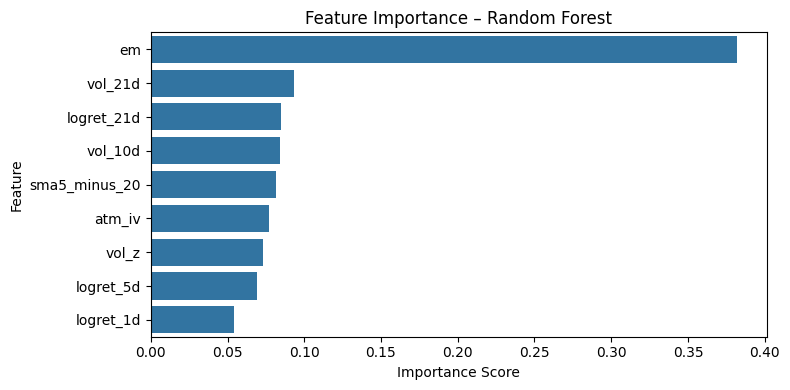

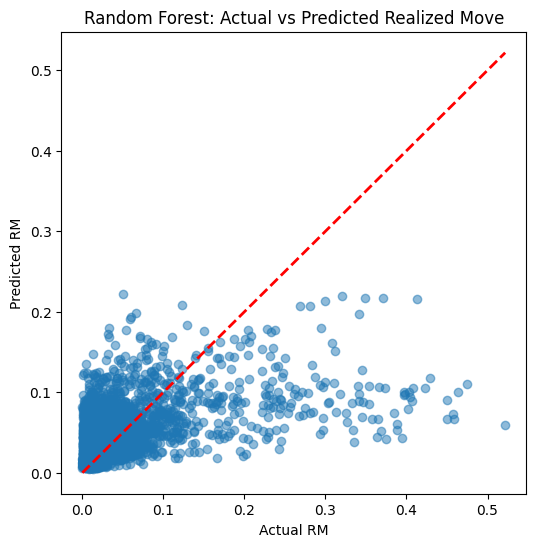

In [ ]:
# === Experiment 1: Random Forest Modeling =====================
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pathlib import Path

# Load your processed dataset
DATASET_PATH = Path("Data/Feature/em_feature_with_RM.csv")
df = pd.read_csv(DATASET_PATH)

# ---- Select relevant features ----
feature_cols = [
    "em", "atm_iv",
    "logret_1d", "logret_5d", "logret_21d",
    "vol_10d", "vol_21d",
    "sma5_minus_20", "vol_z"
]

target_col = "RM"

# Drop missing values (if any)
df = df.dropna(subset=feature_cols + [target_col])

X = df[feature_cols]
y = df[target_col]

# ---- Time-based split (no leakage) ----
# Sort by date before splitting
df = df.sort_values("t_date")
split_index = int(0.75 * len(df))
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# ---- Initialize and train Random Forest ----
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# ---- Predictions ----
y_pred = rf.predict(X_test)

# ---- Evaluation ----
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"  MAE: {mae:.6f}")
print(f"  RMSE: {np.sqrt(mse):.6f}")
print(f"  R²: {r2:.4f}")


Random Forest Regression Evaluation Metrics:
  Mean Absolute Error (MAE): 0.034230
  Root Mean Squared Error (RMSE): 0.060040
  R-squared (R²): 0.2614


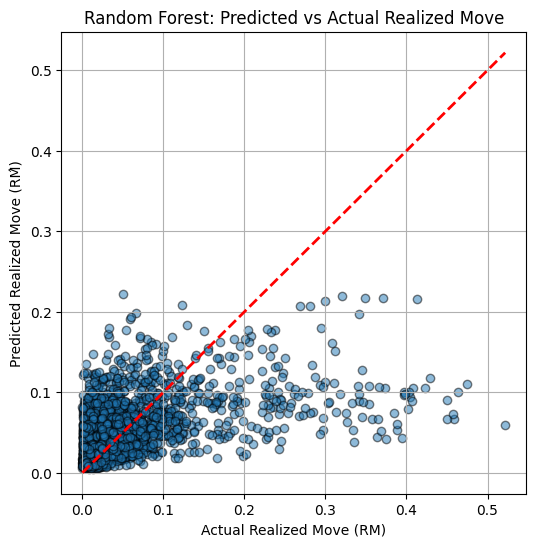

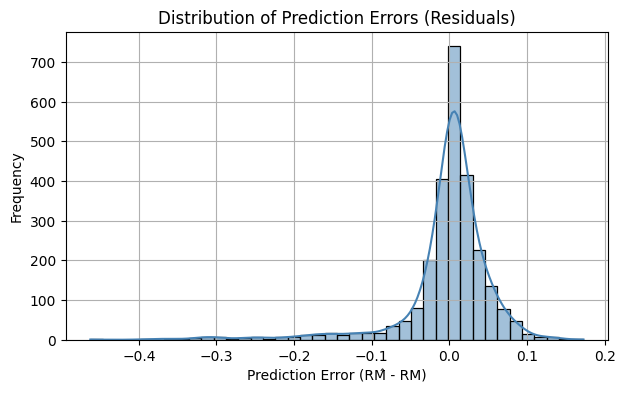

In [12]:
# === Experiment 1: Evaluation (Random Forest Regression) =====================

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are available from Experiment 1: Modeling

# ---- Compute metrics ----
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print("Random Forest Regression Evaluation Metrics:")
print(f"  Mean Absolute Error (MAE): {mae:.6f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"  R-squared (R²): {r2:.4f}")

# ---- Visualization: Predicted vs Actual ----
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual Realized Move (RM)")
plt.ylabel("Predicted Realized Move (RM̂)")
plt.title("Random Forest: Predicted vs Actual Realized Move")
plt.grid(True)
plt.show()

# ---- Visualization: Error Distribution ----
errors = y_pred - y_test
plt.figure(figsize=(7,4))
sns.histplot(errors, bins=40, kde=True, color="steelblue")
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Prediction Error (RM̂ - RM)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [13]:
# === Experiment 2: Random Forest Hyperparameter Tuning =====================
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Load dataset again (to be self-contained)
DATASET_PATH = Path("Data/Feature/em_feature_with_RM.csv")
df = pd.read_csv(DATASET_PATH)

feature_cols = [
    "em", "atm_iv",
    "logret_1d", "logret_5d", "logret_21d",
    "vol_10d", "vol_21d",
    "sma5_minus_20", "vol_z"
]
target_col = "RM"

df = df.dropna(subset=feature_cols + [target_col])
df = df.sort_values("t_date")

X = df[feature_cols]
y = df[target_col]

# Split (time-based)
split_index = int(0.75 * len(df))
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# ---- Define parameter grid ----
param_grid = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [None, 5, 10, 20, 40],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}

# ---- RandomizedSearchCV for efficiency ----
rf = RandomForestRegressor(random_state=42)
rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=25,
    scoring="neg_root_mean_squared_error",
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
rf_search.fit(X_train, y_train)

print("Best Parameters Found:")
print(rf_search.best_params_)

# ---- Evaluate tuned model ----
best_rf = rf_search.best_estimator_
y_pred = best_rf.predict(X_test)

mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print("\nTuned Model Performance:")
print(f"  MAE:  {mae:.6f}")
print(f"  RMSE: {rmse:.6f}")
print(f"  R²:   {r2:.4f}")


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END max_depth=40, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   7.9s
[CV] END max_depth=40, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   8.1s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   9.3s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   9.5s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimato

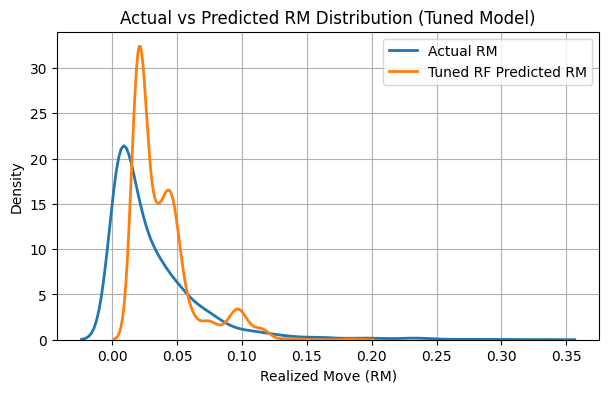

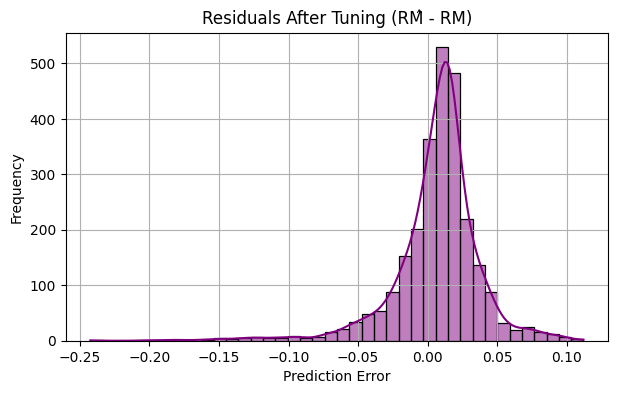

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compare prediction distributions
plt.figure(figsize=(7,4))
sns.kdeplot(y_test, label="Actual RM", linewidth=2)
sns.kdeplot(y_pred, label="Tuned RF Predicted RM", linewidth=2)
plt.title("Actual vs Predicted RM Distribution (Tuned Model)")
plt.xlabel("Realized Move (RM)")
plt.legend()
plt.grid(True)
plt.show()

# Error distribution after tuning
errors = y_pred - y_test
plt.figure(figsize=(7,4))
sns.histplot(errors, bins=40, kde=True, color='purple')
plt.title("Residuals After Tuning (RM̂ - RM)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

# --- Load the dataset (same as before) ---
df = pd.read_csv("Data/Feature/em_feature_with_RM.csv", parse_dates=["t_date"])
feature_cols = ["em","atm_iv","logret_1d","logret_5d","logret_21d","vol_10d","vol_21d","sma5_minus_20","vol_z"]
target_col   = "RM"
df = df.dropna(subset=feature_cols + [target_col]).sort_values("t_date")
X, y = df[feature_cols], df[target_col]

# Time split (keep consistent with earlier experiments)
split_idx = int(0.75 * len(df))
X_train, X_test = X.iloc[:split_idx],  X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx],  y.iloc[split_idx:]
t_test = df["t_date"].iloc[split_idx:]

# --- Use your best params from Experiment 2 (adjust if yours differ) ---
best_rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    max_features="sqrt",
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    oob_score=True,        # enables OOB eval
    n_jobs=-1
)
best_rf.fit(X_train, y_train)

# --- Tree-wise predictions → quantiles ---
tree_preds = np.column_stack([t.predict(X_test) for t in best_rf.estimators_])
pred_p10   = np.percentile(tree_preds, 10, axis=1)
pred_med   = np.percentile(tree_preds, 50, axis=1)   # median
pred_p90   = np.percentile(tree_preds, 90, axis=1)

# --- Point-metric evaluation (on the median) ---
mae  = mean_absolute_error(y_test, pred_med)
rmse = np.sqrt(((y_test - pred_med)**2).mean())
r2   = r2_score(y_test, pred_med)
print("Experiment 3 — Uncertainty-aware RF (median point estimate)")
print(f"  MAE:  {mae:.6f}")
print(f"  RMSE: {rmse:.6f}")
print(f"  R^2:  {r2:.4f}")

# --- Interval coverage: does RM fall in [p10, p90]? ---
inside = (y_test.values >= pred_p10) & (y_test.values <= pred_p90)
coverage = inside.mean()
avg_band = np.mean(pred_p90 - pred_p10)
print(f"  80% interval coverage: {coverage:.3f}")
print(f"  Avg band width: {avg_band:.4f}")


/opt/anaconda3/envs/DataMining/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/DataMining/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/DataMining/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/DataMining/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/DataMining/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature nam

Experiment 3 — Uncertainty-aware RF (median point estimate)
  MAE:  0.020951
  RMSE: 0.032956
  R^2:  0.2431
  80% interval coverage: 0.722
  Avg band width: 0.0661


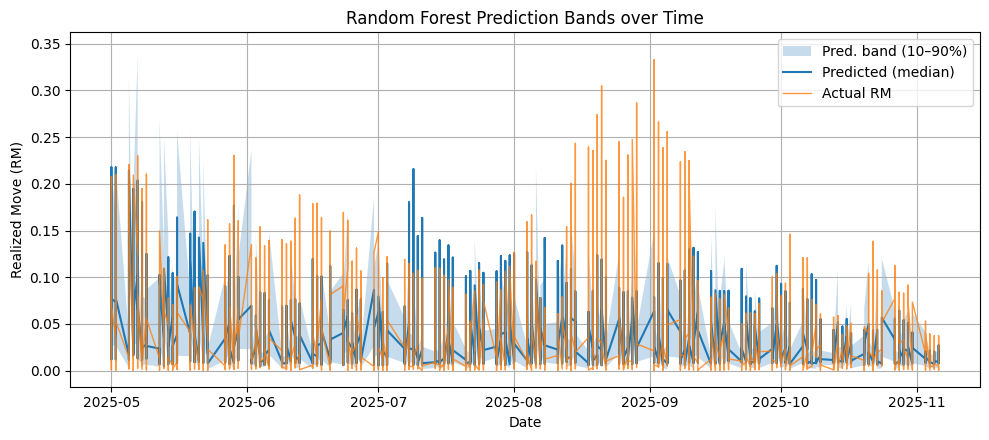

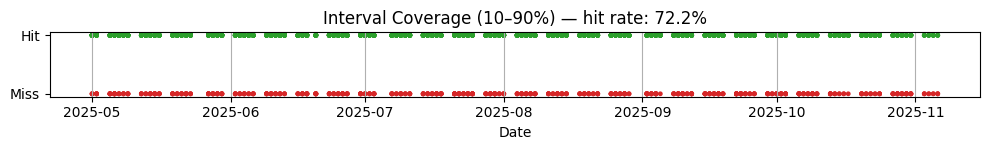

<Figure size 900x400 with 0 Axes>

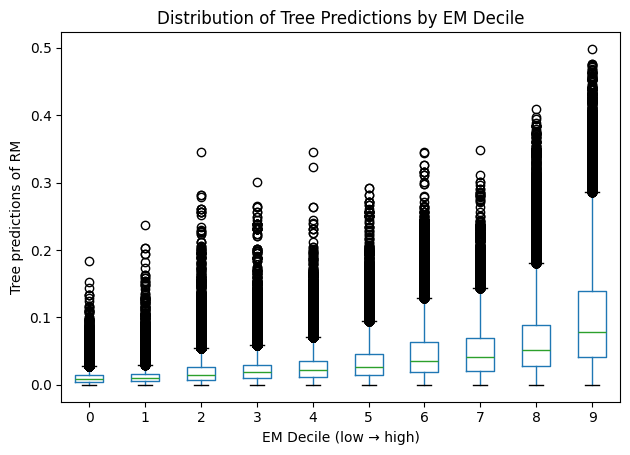

In [21]:
plt.figure(figsize=(10,4.5))
plt.fill_between(t_test, pred_p10, pred_p90, alpha=0.25, label="Pred. band (10–90%)")
plt.plot(t_test, pred_med, lw=1.5, label="Predicted (median)")
plt.plot(t_test, y_test.values, lw=1, alpha=0.8, label="Actual RM")
plt.title("Random Forest Prediction Bands over Time")
plt.xlabel("Date"); plt.ylabel("Realized Move (RM)")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

plt.figure(figsize=(10,1.6))
plt.scatter(t_test, inside.astype(int), s=6, c=np.where(inside, "tab:green", "tab:red"))
plt.yticks([0,1], ["Miss","Hit"])
plt.title(f"Interval Coverage (10–90%) — hit rate: {coverage:.1%}")
plt.xlabel("Date"); plt.grid(True, axis="x"); plt.tight_layout(); plt.show()

# Bin by EM deciles to see how uncertainty changes with market-implied move
em_test = X_test["em"].values
deciles = pd.qcut(em_test, 10, labels=False, duplicates="drop")
spread = pd.DataFrame({
    "decile": np.repeat(deciles, tree_preds.shape[1]),
    "tree_pred": tree_preds.ravel()
})
plt.figure(figsize=(9,4))
# Box plot of tree predictions per EM decile
spread.boxplot(column="tree_pred", by="decile", grid=False)
plt.suptitle("")
plt.title("Distribution of Tree Predictions by EM Decile")
plt.xlabel("EM Decile (low → high)"); plt.ylabel("Tree predictions of RM")
plt.tight_layout(); plt.show()

